
# 📘 Introduction

In the modern retail landscape, leveraging data to drive decisions is more important than ever. This project aims to predict Superstore sales using machine learning regression techniques, with the broader goal of uncovering valuable business insights.

By going through the complete data science workflow—starting from problem understanding, data preprocessing, and exploratory data analysis (EDA), to model building and evaluation—we demonstrate how predictive analytics can help identify high-performing segments, profitable regions, and product demand patterns.

Ultimately, this project serves as a practical example of applying regression models to a real-world retail dataset for strategic business forecasting and decision-making.

# 🧩 Problem Statement
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid. We are going to take this a step further and try and build a Regression model to predict the sales or profit for the store. Here, we are going to try to predict Sales in this notebook.

In general, there are two types of regressions:
* Logisctic Regression : Logistic Regression is used to predict the categorical dependent variable using a given set of independent variables.
* Linear Regression : Linear regression is used to predict the continuous dependent variable using a given set of independent variables.

Here, we are going to use linear regression as our target variable consists of continuous values.

Although this notebook deals only with the regression problem of this particular superstore, same approach can be used for any other kind/type of regression problem.

After understanding the problem statement and it's nature, we move to generating hypothesis for the problem. It is the process of lisiting out all the possible factors that have an affect on the target variable.

## 🎯 Objective

To predict the sales value based on customer, product, and regional data using machine learning regression techniques, while also:
- Understanding which product categories and customer segments are most profitable.
- Analyzing seasonal and regional sales patterns.
- Building a model that generalizes well for unseen data.


# Hypothesis Generation
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible that can have an impact on the target variable.

We are going to look at this problem statement from the point of view of a Business Manager and try to find out weak areas to make more Sales.
 Some of the questions we will try to answer are:
*  What is the average sales per month for the month?
*  What is the top demanded product in United States?
*  What is the favourite shipping mode for customers?

# 🧰 1. Importing Libraries
"A well-prepared data analysis starts with importing the right tools."
In this section, we import the essential Python libraries required for our analysis:
* NumPy and Pandas for numerical operations and data manipulation.
* Matplotlib and Seaborn for static data visualization.


We also enable %matplotlib inline to render plots directly within the notebook environment.

Loading Packages

In [ ]:
from re import I
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from prettytable import PrettyTable
%matplotlib inline

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

colors = ['#F0D290','#DE834D','#A3423C','#781D42']
colors2 = ['#F0D290','#DE834D','#A3423C','#781D42','#671E31']
colors3 = ['#f0d290','#e9c083','#e2af77','#d99d6d','#d08c64', '#c67b5d',
           '#bc6b56','#b05a51','#a34b4d','#963b49', '#872c45','#781d42']

from xgboost import XGBRegressor


# 📂 2. Loading the Dataset
"We begin the analysis by loading the dataset into memory."
* For this practice problem, we have a CSV files: Superstore_Data.csv
* Viewing the first few rows (.head()) offers a preview of how the data is structured, helping to verify a successful load and giving early insights into the content.


 Loading data

In [2]:
df = pd.read_csv(r"C:\Users\91801\OneDrive\Desktop\AI\Projects\Regression Project\Superstore_data.csv", encoding= 'unicode_escape')
df.head(7)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656


Data overview - In this section we explore the what are the features we have, dimensions of the data, the types of attributes, and stastical information about numberical features.

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

* Reviewing the .head() function we can see that the columns having information about the date is not actually an datetime object, but rather string. Let us change it to pandas datetime object.

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%m/%d/%Y')

In [7]:
df.insert(loc=3,column='order_month_year',
          value=df['Order Date'].dt.to_period('M'))
df.insert(loc=8,column='ship_month_year',
          value=df['Ship Date'].dt.to_period('M'))

In [8]:
df.insert(loc=4,column='order_day',value=df['Order Date'].dt.day)
df.insert(loc=5,column='order_month',value=df['Order Date'].dt.month)
df.insert(loc=6,column='order_year',value=df['Order Date'].dt.year)

In [9]:
df.insert(loc=9,column='ship_day',value=df['Ship Date'].dt.day)
df.insert(loc=10,column='ship_month',value=df['Ship Date'].dt.month)
df.insert(loc=11,column='ship_year',value=df['Ship Date'].dt.year)

In [10]:
df.head(7)

,Row ID,Order ID,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06,12,6,2016,2016-06-16,Second Class,16,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06,9,6,2014,2014-06-14,Standard Class,14,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06,9,6,2014,2014-06-14,Standard Class,14,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656


In [14]:
print( df.shape)

(9994, 29)


We can see this is a very large dataset. That is good for us as we'll have sufficient data to train our model.

Looking at the shape of the dataset, we have more than sufficient data to train our model on. So, we will split this dataset into training and testing, making it a 70-30 split respectively.

In [15]:
raw_train = df.iloc[:6993]
raw_test = df.iloc[6994:].drop(columns='Sales')

For this practice problem:
* raw_train: will be used for training the model, i.e. our model will learn from this dataframe. It contains all the feature variables and the target variable.
* raw_test: contains all the feature variables, but not the target variable. We will apply the model to predict the target variable for the test data.

It's always a good idea to make a copy of the dataset because in case we make changes to the given dataset we still have a backup of the original dataset.

In [16]:
train_orignal = raw_train.copy()
test_orignal = raw_test.copy()

# 3. 📈 Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a foundational step in the data science process that allows us to understand the data's structure, identify patterns, detect anomalies, and extract meaningful insights. It sets the stage for informed feature engineering and model building.

 First things first, let's drop all the columns that pose to be irrelevant for our EDA purposes.

In [17]:
raw_train.columns

Index(['Row ID', 'Order ID', 'Order Date', 'order_month_year', 'order_day',
       'order_month', 'order_year', 'Ship Date', 'Ship Mode', 'ship_day',
       'ship_month', 'ship_year', 'Customer ID', 'Customer Name',
       'ship_month_year', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [18]:
raw_train.drop(columns=['Row ID','Order ID','Customer ID',
                        'Customer Name','Product ID','Product Name'],inplace=True)
raw_test.drop(columns=['Row ID','Order ID','Customer ID',
                        'Customer Name','Product ID','Product Name'],inplace=True)

raw_train.columns

Index(['Order Date', 'order_month_year', 'order_day', 'order_month',
       'order_year', 'Ship Date', 'Ship Mode', 'ship_day', 'ship_month',
       'ship_year', 'ship_month_year', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [19]:
raw_test.columns

Index(['Order Date', 'order_month_year', 'order_day', 'order_month',
       'order_year', 'Ship Date', 'Ship Mode', 'ship_day', 'ship_month',
       'ship_year', 'ship_month_year', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

 Next, we are going to check if there are any duplicate entries in the dataset and drop those.

In [20]:
raw_train.duplicated().sum()

1

In [21]:
raw_train.drop_duplicates(inplace=True)
raw_train.duplicated().sum()

0

 In this dataset, there are mainly three types of data—categorical data, numerical data and pandas datetime.
* Categorical features: Ship Mode, Segment, Country, City, State, Region, Category, Sub-Category
* Numerical features: Postal Code, Sales, Quantity, Discount, Profit
* Datetime features: Order Date, order_month_year, Ship Date, ship_month_year

# 4.🧭 Univariate Analysis

### 🔍 Univariate Analysis
This involves analyzing the distribution and characteristics of individual variables. The focus was primarily on:
- **Sales**: Found to be right-skewed, indicating a small number of very high-value orders.
- **Profit**: Revealed both highly profitable and loss-incurring transactions.
- **Discount**: Mostly clustered around standard promotional values like 0.2 (20%).
- **Quantity**: Showed that customers typically purchase 2–3 items per order.
- **Categorical features** such as `Ship Mode`, `Segment`, `Region`, and `Category` were visualized using bar plots to understand the frequency distribution.

These insights help us grasp how the data is spread and whether any variables might require transformation (e.g., normalization or encoding).


🧪 Categorical Features

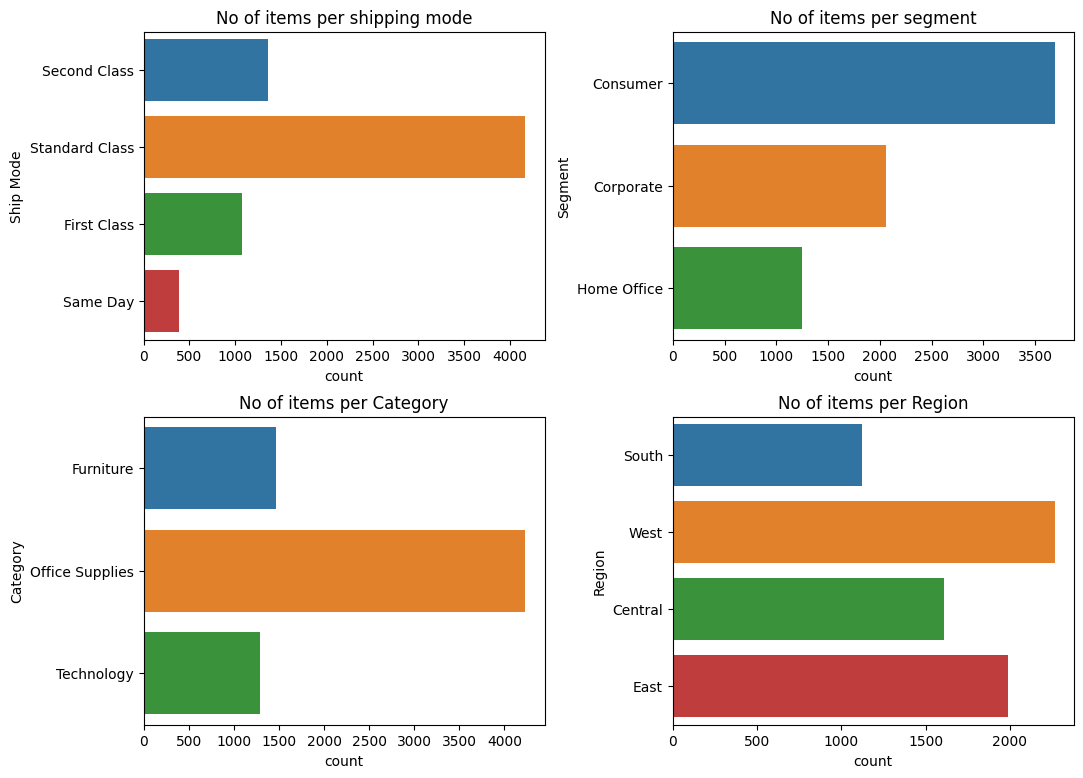

In [22]:
plt.figure(1,figsize=(12,9))
plt.subplots_adjust(wspace=0.32,hspace=0.25)

plt.subplot(221)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
sns.countplot(data=raw_train,y='Ship Mode',orient='h',palette=colors);
plt.title('No of items per shipping mode')

plt.subplot(222)
sns.countplot(data=raw_train,y='Segment',orient='h',palette=colors);
plt.title('No of items per segment')

plt.subplot(224)
sns.countplot(data=raw_train,y='Region',orient='h',palette=colors);
plt.title('No of items per Region')

plt.subplot(223)
sns.countplot(data=raw_train,y='Category',orient='h',palette=colors);
plt.title('No of items per Category');

plt.show()

From the above graphs we can deduce:
* Around 60% of the shipment happens in 'Standard Class' mode.
* 'Consumer' segment makes up for around 50% of dataset
* 60% of the items are 'Office Supplies'
* Majority of the items in dataset are from the 'West' region

🧪 Numerical Features
 
Till now we have seen the categorical variables and now lets visualize the numerical variables. Lets look at the distribution of Sales first.

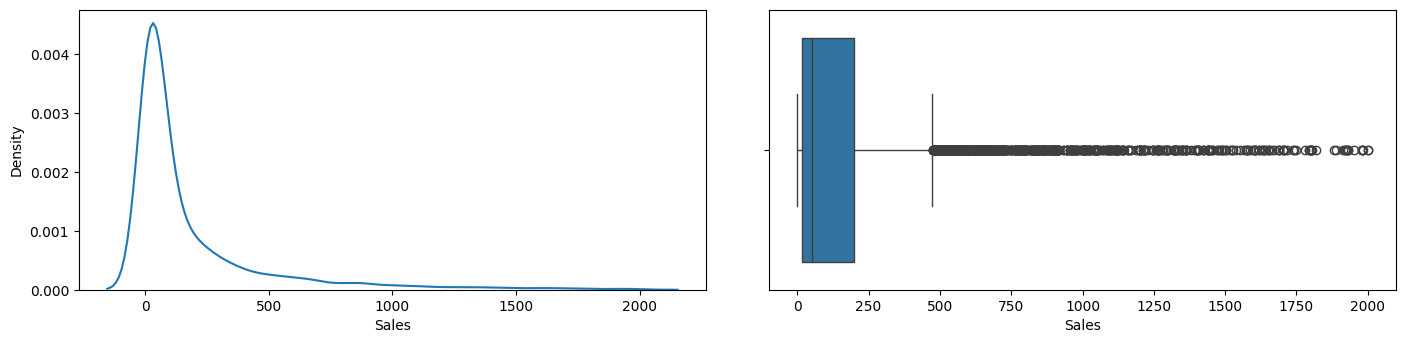

In [23]:
plt.figure(2,figsize=(17,8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=raw_train[raw_train['Sales']<=2000],x='Sales')
plt.subplot(222)
sns.boxplot(data=raw_train[raw_train['Sales']<=2000],x='Sales',orient='h');

It can be inferred that most of the data in the distribution of Sales is towards left which means it is not normally distributed. The boxplot shows the pressence of outliers

<Axes: xlabel='Discount'>

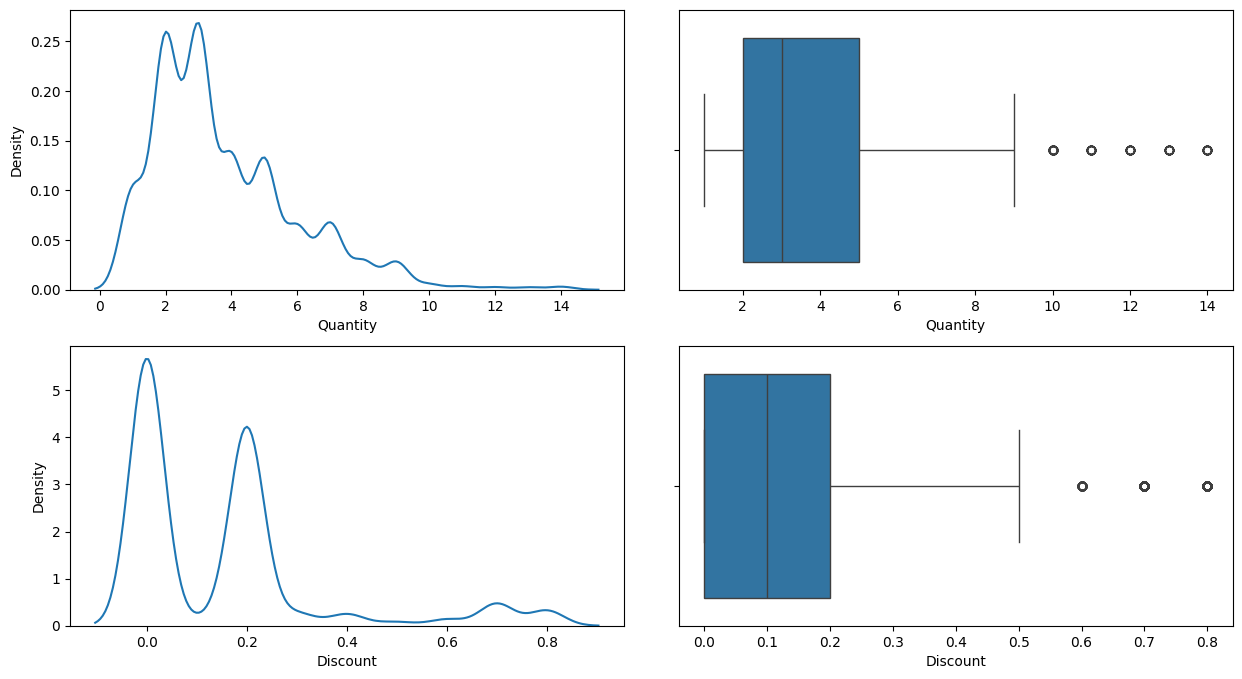

In [24]:
plt.figure(3,figsize=(15,8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=raw_train,x='Quantity')

plt.subplot(222)
sns.boxplot(data=raw_train,x='Quantity',orient='h')

plt.subplot(223)
sns.kdeplot(data=raw_train,x='Discount')

plt.subplot(224)
sns.boxplot(data=raw_train,x='Discount',orient='h')

We can infer the following from the above two graphs:
* From histplots:
1. Most of the population from the dataset has bought 3 items.
2. 20% discount rate is most common
* From boxplots:
1. Boxplot on 'Quantity' shows that item purchase of more than 9 is very rare, and there are 5 such outliers
2. Discount rates of 60, 70, 80 are rare.

<Axes: xlabel='Profit'>

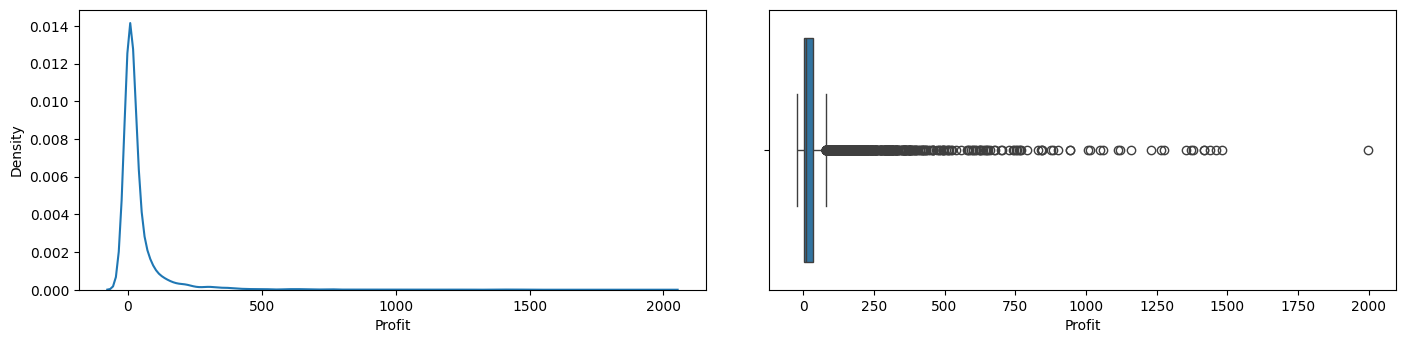

In [25]:
plt.figure(4,figsize=(17,8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=raw_train[(raw_train['Profit']<=2000) & (raw_train['Profit']>=-20)],x='Profit')

plt.subplot(222)
sns.boxplot(data=raw_train[(raw_train['Profit']<=2000) & (raw_train['Profit']>=-20)],x='Profit',orient='h')

# 5.📊 Bivariate Analysis

### 🔗 Bivariate Analysis
Bivariate analysis examines relationships between two variables to identify patterns or correlations:
- **Sales vs Shipping Mode**: Found that most orders were shipped using **Standard Class**, but higher sales were observed with **Second Class** and **First Class** modes.
- **Profit by Region**: While the Central region had high sales, the South region was found to be more profitable on average.
- **Top-selling categories**: `Office Supplies` dominated in terms of volume, but not necessarily in profit margins.
- **Segment vs Profit**: The `Consumer` segment contributed the most to overall profit.

These comparisons are critical for validating our business hypotheses and informing feature engineering decisions.


Conducting a bivariate analysis is important part of the pipeline. This is because it helps us try to establish relationships between the features and to test our hypotheses. Broadly speaking, trying to establish these relationships and bring out insights are what a Data Scientist is paid for.

 Let's try to recall some of the questions we were going to try to answer through these insights.
* What is the average sales per month for the month?
* What is the top demanded product in United States?
* What is the favourite shipping mode for customers? 

Q1. What is the average sales/month for the store?

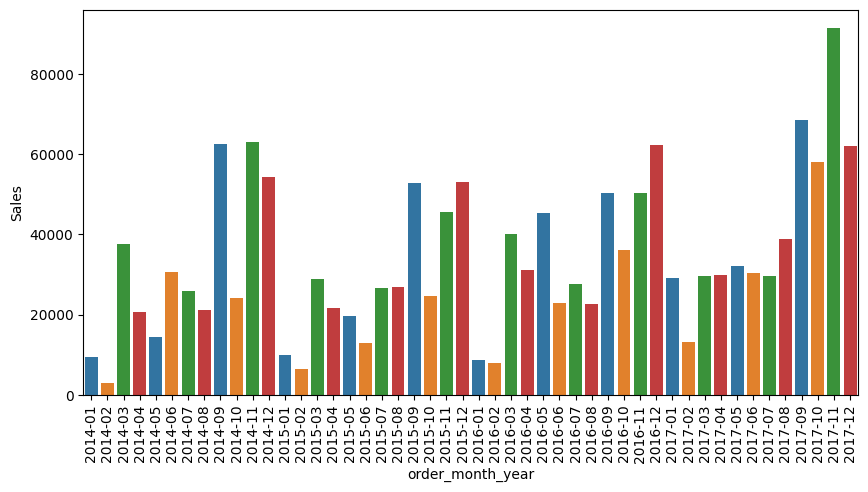

In [26]:
monthly_sales = pd.DataFrame(raw_train.groupby('order_month_year')[['Quantity','Sales']].sum()).reset_index()
plt.figure(figsize=(10,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
sns.barplot(x='order_month_year',y='Sales',data=monthly_sales,palette=colors)
plt.xticks(rotation=90)
plt.show()

Q2. What is the top demanded product in United States?



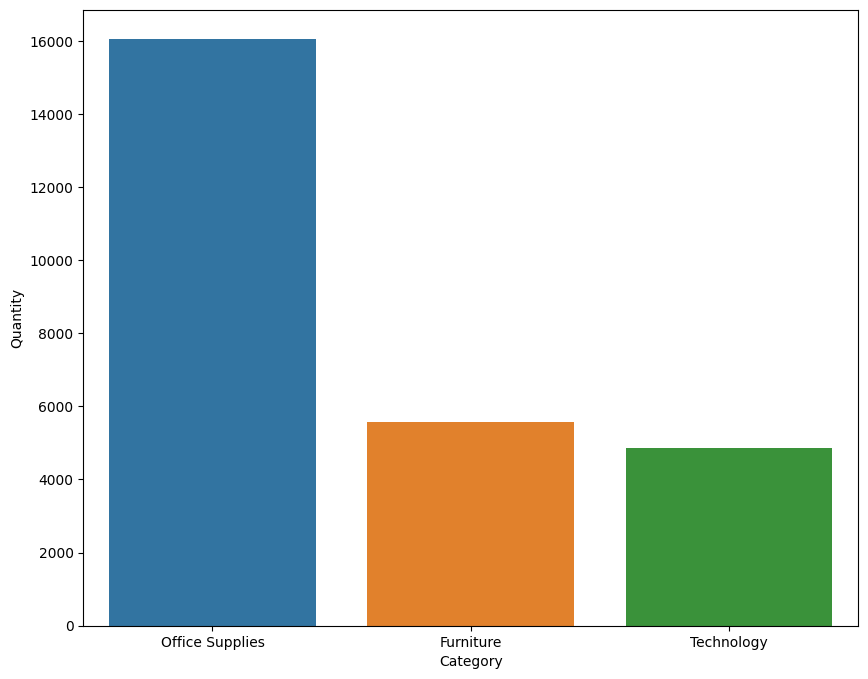

In [27]:
most_demand_qty = pd.DataFrame(raw_train.groupby('Category')['Quantity'].sum()).reset_index()
most_demand_qty.sort_values(by='Quantity',ascending=False,inplace=True)

top_category = pd.DataFrame(most_demand_qty.groupby('Category')['Quantity'].sum()).reset_index()
top_category.sort_values(by='Quantity',ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(data=top_category,x='Category',y='Quantity',palette=colors)
plt.show()

It is very clear that the most demanded product in US are office supply products.

 Q3. What is the favourite shipping mode for customers?

<Axes: >

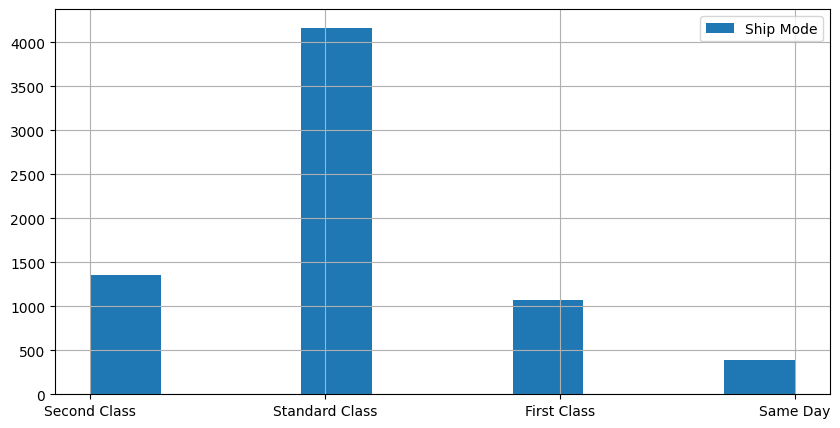

In [28]:
raw_train['Ship Mode'].hist(figsize=(10,5),legend=True)

It's Standard Class, no contest.

Until now, we tried to answer some basic questions. We can get more deeper insights into regression data by doing time series analysis. Here are some of the questions we will try to answer doing the same:
* How have Sales changed through the years?
* What are the number of Sales/Category?
* Number of Sales/Mode of shipment.
* Number of Sales/Region.
* What are the Sales for each Region?
* Which Region is Profitable to the superstore?
* How do the Profit in different Segments compare in different Regions?
* Mean Profit for different Segments in different Regions

# 6.⏰ Time Series Analysis

### 📆 Time Series Analysis
We investigated how **sales** and **quantity** changed over time to detect seasonality and long-term trends:
- Monthly sales trends showed a significant increase in the last quarter (Q4) of each year.
- Sales peaked around **November and December**, likely due to holiday shopping.
- A consistent year-end spike suggests potential for incorporating **seasonal features** into the model.

Time-based insights allow us to build features that reflect cyclical patterns, helping the model learn more contextually.

 What are the Number of Sales/Category, Number of Sales/Mode of shipment, Number of Sales/Mode of shipment repectively?

In [29]:
regions = raw_train['Region'].unique()
shipmodes = raw_train['Ship Mode'].unique()
categories = raw_train['Category'].unique()

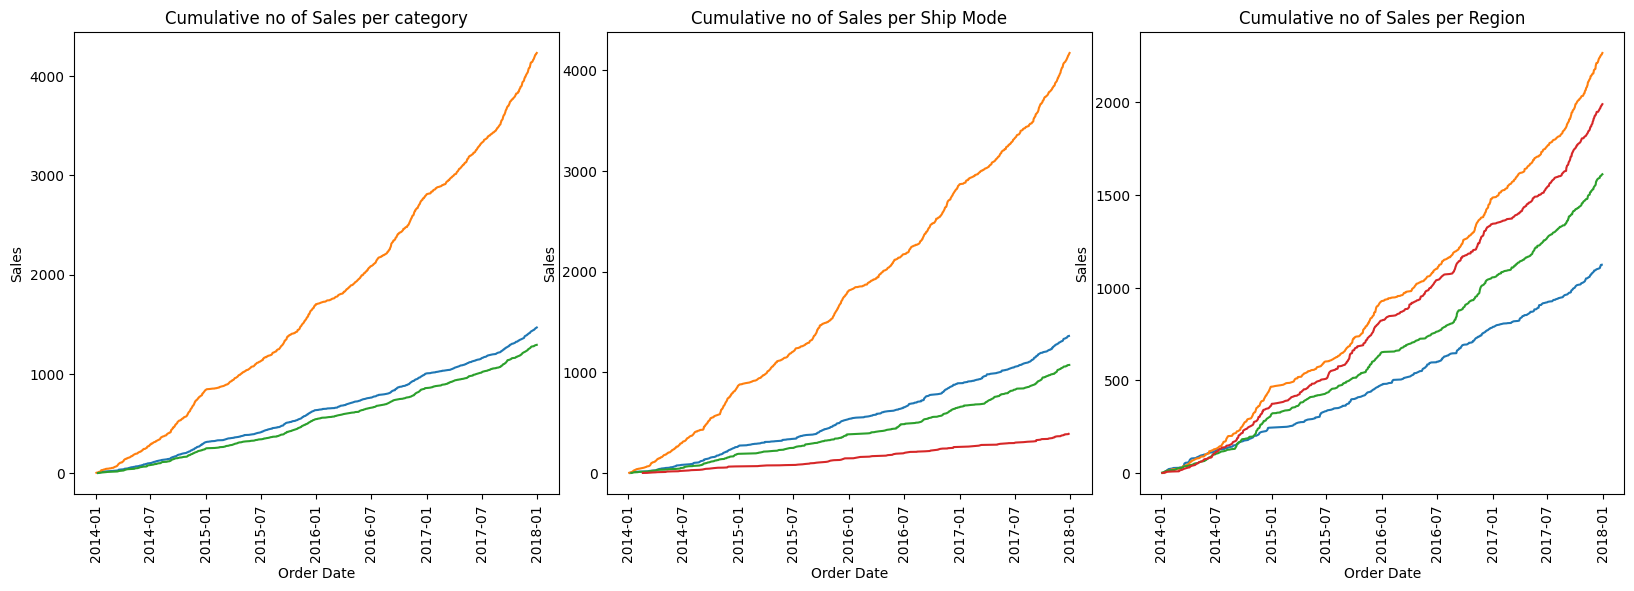

In [30]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.1);

dfbyCatOrderDate = raw_train.groupby(['Category','Order Date'])
plt.subplot(131).title.set_text('Cumulative no of Sales per category')
plt.xticks(rotation=90)
for cat in categories:
  data = dfbyCatOrderDate['Sales'].count()[cat]
  data = data.cumsum()
  sns.lineplot(data=data,ax=plt.subplot(131))

dfbyShipOrderDate = raw_train.groupby(['Ship Mode','Order Date'])
plt.subplot(132).title.set_text('Cumulative no of Sales per Ship Mode')
plt.xticks(rotation=90)
for shipmode in shipmodes:
  data = dfbyShipOrderDate['Sales'].count()[shipmode]
  data = data.cumsum()
  sns.lineplot(data=data,ax=plt.subplot(132))

dfbyRegionOrderDate = raw_train.groupby(['Region','Order Date'])
plt.subplot(133).title.set_text('Cumulative no of Sales per Region')
plt.xticks(rotation=90)
for region in regions:
  data = dfbyRegionOrderDate['Sales'].count()[region]
  data = data.cumsum()
  sns.lineplot(data=data,ax=plt.subplot(133))

 We can see that the sales have increased over the years indicating that the superstore business is doing well and might also be profitable. Looking at the graph we can also infer that at the end of each year there is rise in the sales, attributing to the fact that it is holiday season around this time.

 What are the Sales for each Region?

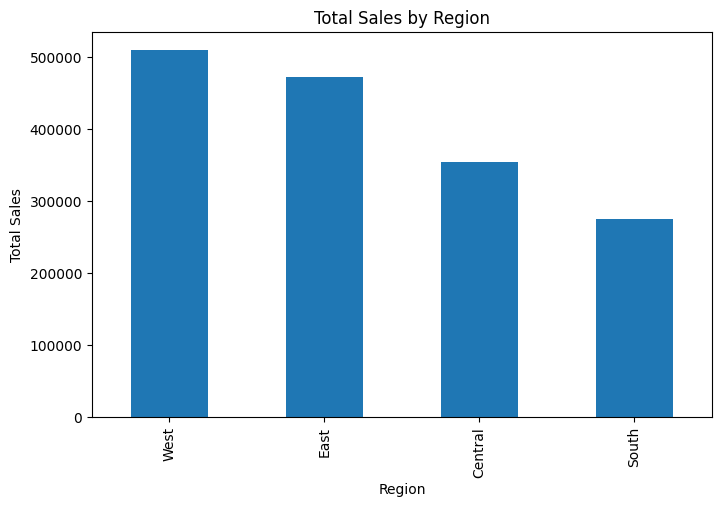

In [31]:
plt.figure(7,figsize=(8,5))
dfByRegion = raw_train.groupby('Region')
dfByRegion['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.show()

 Which Region is Profitable to the superstore?

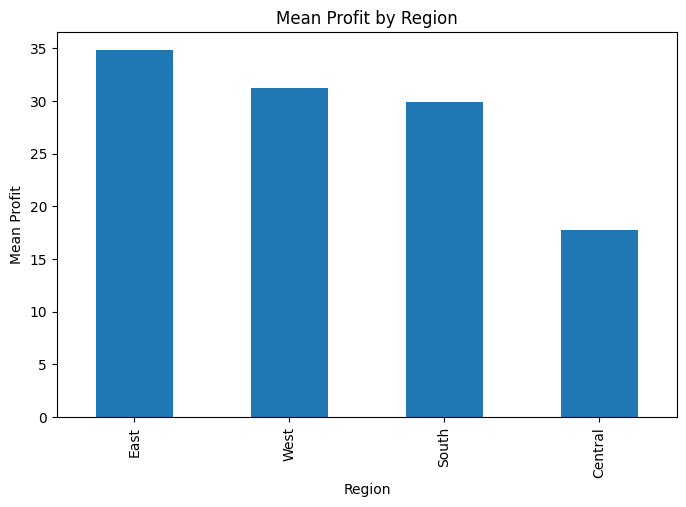

In [32]:
plt.figure(6, figsize=(8, 5))  
# dfByRegion = raw_train.groupby('Region') 
plt.ylabel('Mean Profit'); 
dfByRegion['Profit'].mean().sort_values(ascending=False).plot(kind='bar'); 
plt.title("Mean Profit by Region");

* How do the Profit in different Segments compare in different Regions?



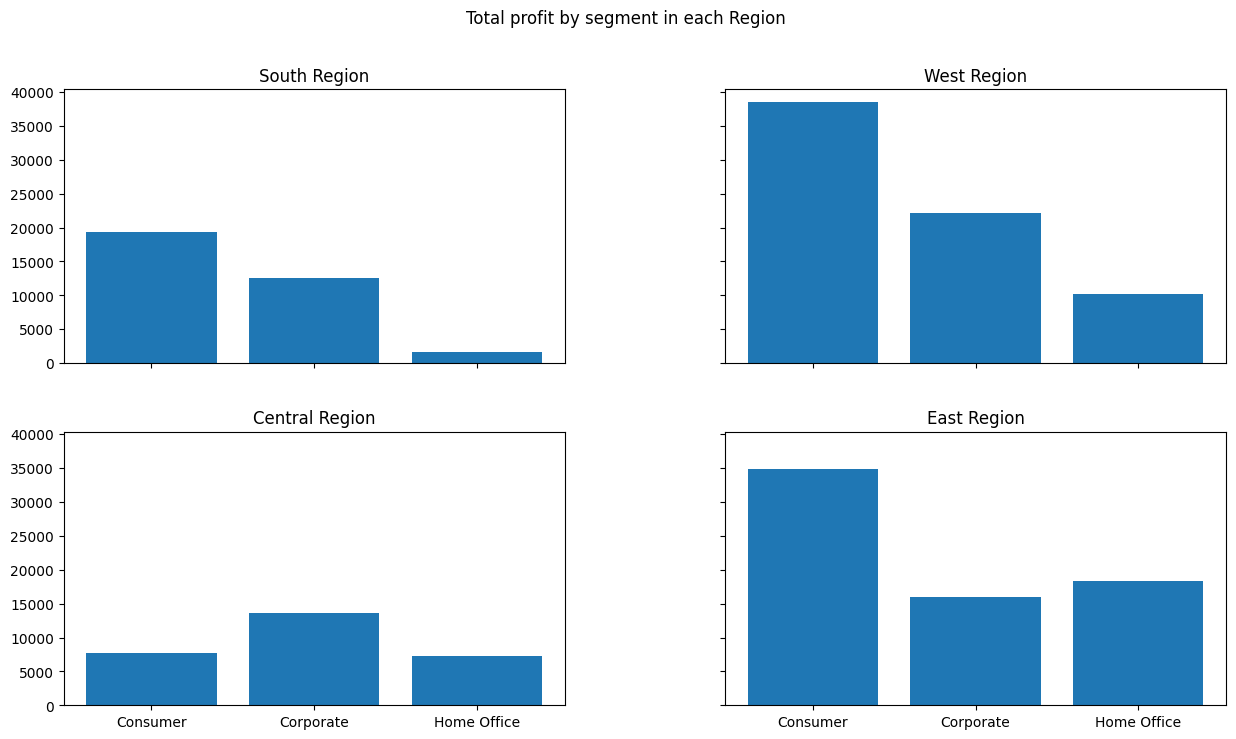

In [161]:
dfByRegionSegment = raw_train.groupby(['Region','Segment'])
fig,axs = plt.subplots(2,2,sharey=True,sharex=True,figsize=(15,8))
axsIdx = [[0,0],[0,1],[1,0],[1,1]]
plt.subplots_adjust(wspace=0.32,hspace=0.25)
for idx, region in enumerate(regions):
  data = dfByRegionSegment['Profit'].sum()[region]
  axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index,data.values)
  axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f'{region} Region')
plt.suptitle('Total profit by segment in each Region')
plt.show()

We can see that the Consumer Segment is responsible for the most Profit in all Regions besides the Central Region. We can also see that the West and South Regions are similar with each Segment's Profits share order. Another observation is that the Home Office segment is more important in the East Region.

What is the Mean Profit for different Segments in different Regions?

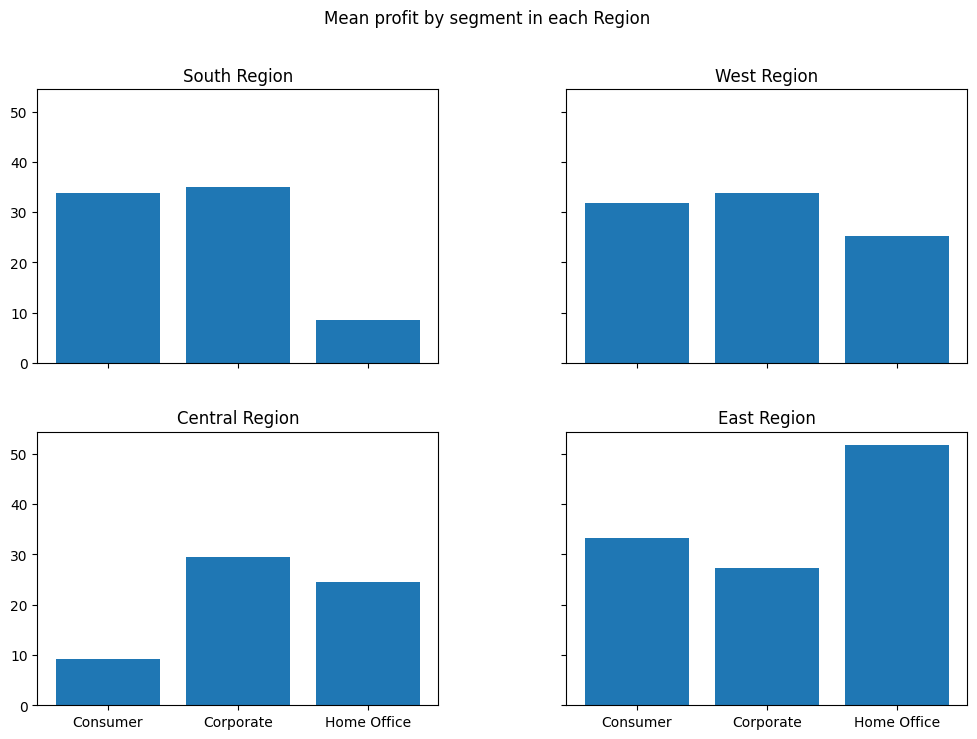

In [162]:
dfByRegionSegment = raw_train.groupby(['Region','Segment'])
fig,axs = plt.subplots(2,2,sharey=True,sharex=True,figsize=(12,8))
axsIdx = [[0,0],[0,1],[1,0],[1,1]]
plt.subplots_adjust(wspace=0.32,hspace=0.25)
for idx, region in enumerate(regions):
  data = dfByRegionSegment['Profit'].mean()[region]
  axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index,data.values)
  axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f'{region} Region')
plt.suptitle('Mean profit by segment in each Region')
plt.show()

Differently from the Total Profit, although the Consumer Segment is very important in all but the Central Region, it is not always the one with the highest Mean Profit. We see a clear advantage of the Home Office Segment compared to the other in the East Region. 

In the same way, the Consumer Segment has a clear disavantage over the others at the Central Region. At the West Region, it can be said that there is a somewhat equal share of all Segments of Mean profit. 

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

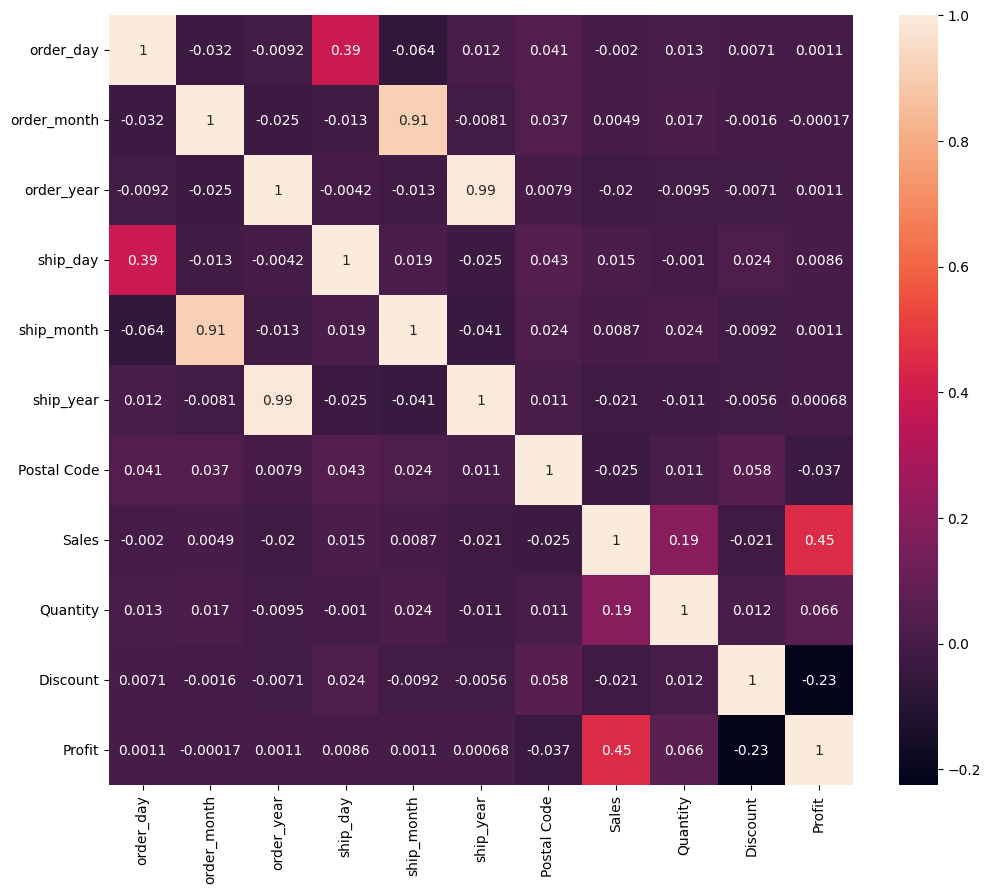

In [163]:
numerical_raw_train = raw_train.select_dtypes(include=np.number)
matrix = numerical_raw_train.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(matrix,annot=True)

 We see that the most correlated variables are (order_day - ship_day), (order_month - ship_month), (order_year - ship_year), (Sales - Profit) and (Profit Discount).

 After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

# 7.🔎 Missing value imputation

Handling missing data is a crucial part of data preprocessing, as missing values can negatively impact model performance, distort statistical analysis, or lead to biased insights.

In this dataset, we began by checking for null values in all columns using `.isnull().sum()`.

Let’s list out feature-wise count of missing values.

In [164]:
raw_train.isnull().sum()

,0
Order Date,0
order_month_year,0
order_day,0
order_month,0
order_year,0
Ship Date,0
Ship Mode,0
ship_day,0
ship_month,0
ship_year,0


Luckily for us there are no null values. But in case they were present, we could consider these methods to fill them:
* For numerical variables: imputation using mean or median.
* For categorical variables: imputation using mode.

# 8. 🪛 Outlier Treatment ⚙️🔧

As we know that we have to treat outliers  as the presence of outliers affects the distribution of the data. 
For the sample data set:
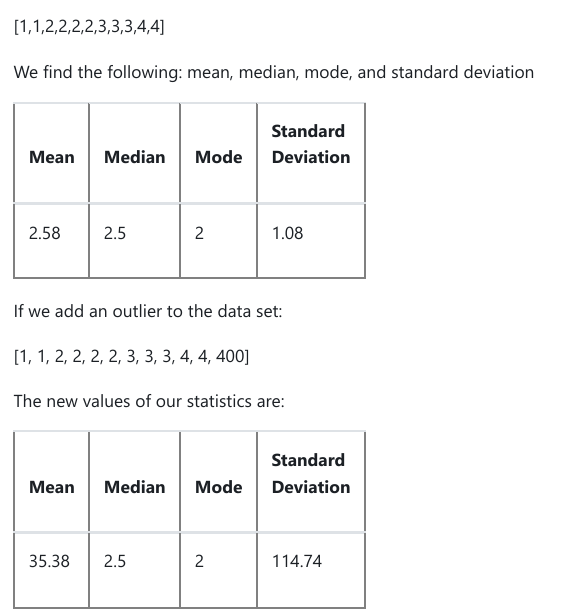

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.


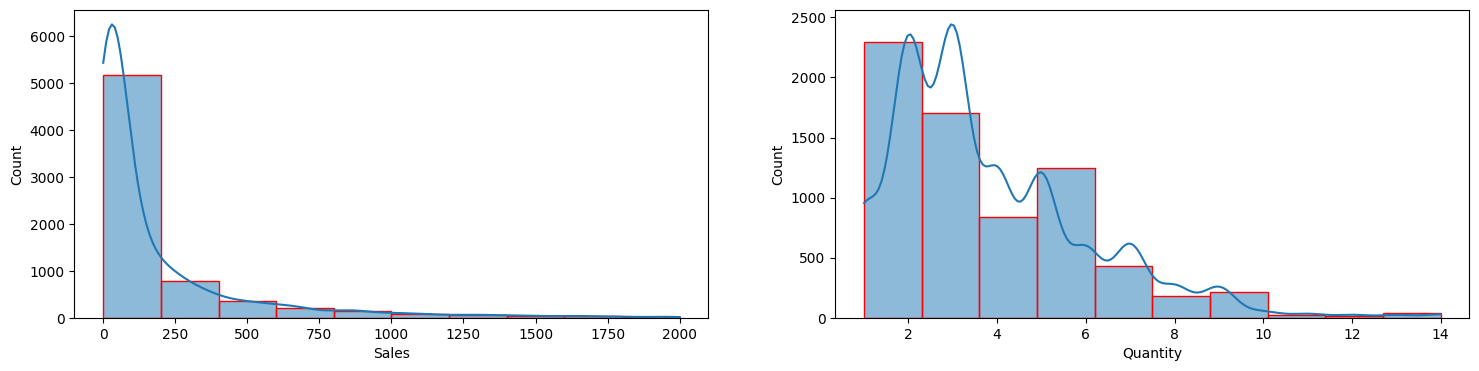

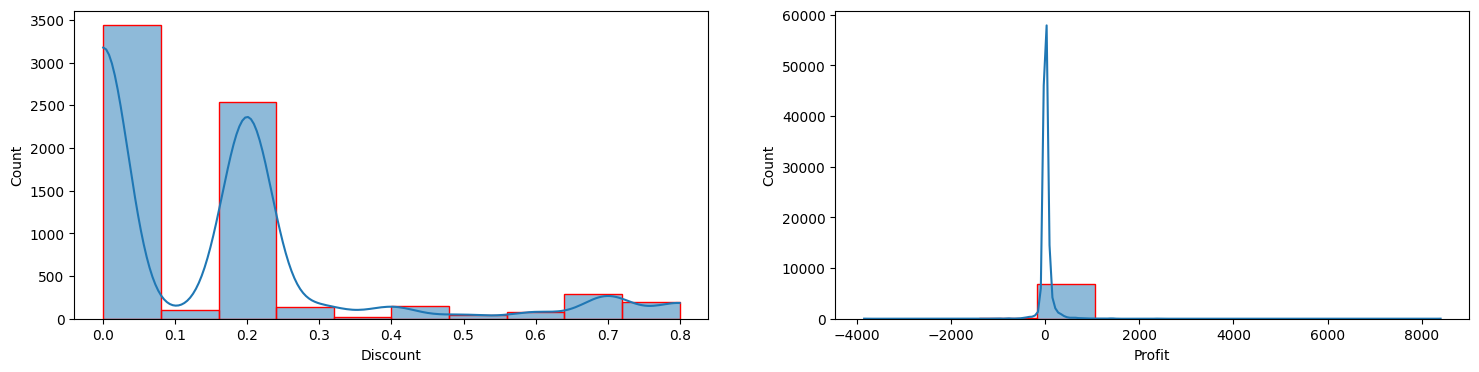

In [165]:
plt.figure(10,figsize=(18,4))
plt.subplots_adjust(wspace=0.2);
sns.histplot(data=raw_train[raw_train['Sales']<=2000],
             x='Sales',ax=plt.subplot(121),bins=10,kde=True,edgecolor='red')
sns.histplot(data=raw_train,x='Quantity',
             ax=plt.subplot(122),bins=10,kde=True,edgecolor='red');

plt.figure(11,figsize=(18,4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=raw_train,x='Discount',
             ax=plt.subplot(121),bins=10,kde=True,edgecolor='red');
sns.histplot(data=raw_train,x='Profit',
             ax=plt.subplot(122),bins=10,kde=True,edgecolor='red');

Due to these outliers, bulk of the data in the columns is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. But here we are not going to be using log transformation rather boxcox transformation. Some reasons for this are:
* The Box-Cox transformation yielded a better residual structure of the models by reducing the skew,
* the transformation bias is smaller using the Box-Cox transformation, and
* the mean squared error of estimation is smaller with the Box-Cox transformation.

For the purposes of carrying out the transformation it seemed useful to separate the particular code into a function, and that is what we did here with the data_transform() function.

In [166]:
def data_transform(dataFrame):
  posData = dataFrame[dataFrame>0]
  bcData,lam = stats.boxcox(posData)
  dataFrame[dataFrame>0] = bcData
  dataFrame[dataFrame<=0] = -1/lam
  return dataFrame

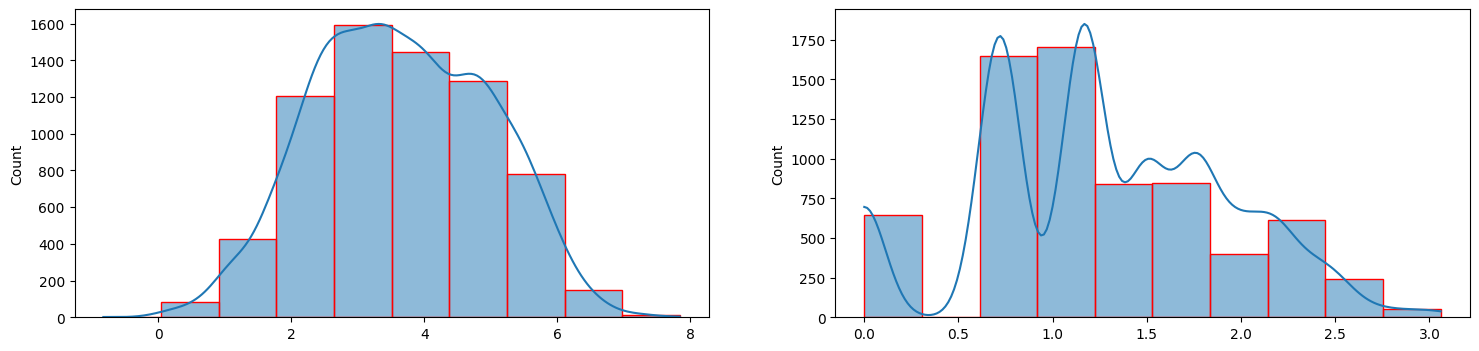

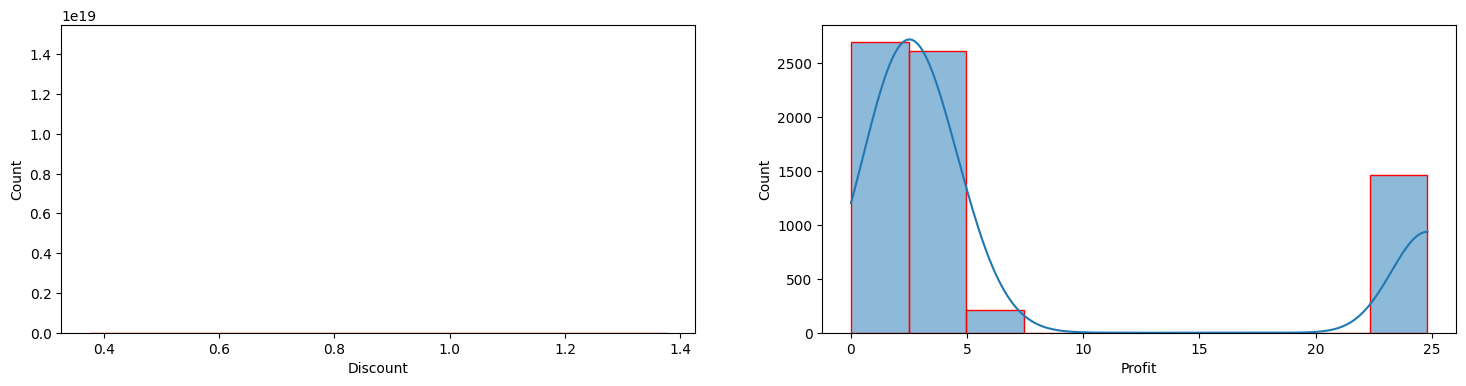

In [167]:
plt.figure(13,figsize=(18,4))
plt.subplots_adjust(wspace=0.2);
sns.histplot(data=stats.boxcox(raw_train['Sales'])[0],
              ax = plt.subplot(121),bins=10,kde=True,edgecolor='red')
sns.histplot(data=stats.boxcox(raw_train['Quantity'])[0],
             ax=plt.subplot(122),bins=10,kde=True,edgecolor='red');

plt.figure(11,figsize=(18,4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=data_transform(raw_train['Discount'].copy()),
             ax = plt.subplot(121),bins=10,kde=True,edgecolor='red');

sns.histplot(data=data_transform(raw_train['Profit'].copy()),
             ax = plt.subplot(122),bins=10,kde=True,edgecolor='red');

Now the distribution looks much closer to normal distribution and effect of extreme values has been significantly reduced. Let’s add this transformed data
 to our raw_train and build a linear regression model and make predictions

In [168]:
raw_train['Loss'] = raw_train[raw_train['Profit']<0]['Profit'].abs()
raw_train['Loss'].fillna(value=0,inplace=True)
raw_train['Profit'] = np.where(raw_train['Profit']<0,0,raw_train['Profit'])

raw_test['Loss'] = raw_test[raw_test['Profit']<0]['Profit'].abs()
raw_test['Loss'].fillna(value=0,inplace=True)
raw_test['Profit'] = np.where(raw_test['Profit']<0,0,raw_test['Profit'])

raw_train['sales_transform'] = stats.boxcox(raw_train['Sales'])[0]
raw_train['quantity_transform'] = stats.boxcox(raw_train['Quantity'])[0]
raw_train['profit_transform'] = data_transform(raw_train['Profit'].copy())
raw_train['loss_transform'] = data_transform(raw_train['Loss'].copy())
raw_train['discount_transform'] = data_transform(raw_train['Discount'].copy())

raw_test['quantity_transform'] = stats.boxcox(raw_test['Quantity'])[0]
raw_test['profit_transform'] = data_transform(raw_test['Profit'].copy())
raw_test['loss_transform'] = data_transform(raw_test['Loss'].copy())
raw_test['discount_transform'] = data_transform(raw_test['Discount'].copy())
raw_train.head()

,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,ship_month,ship_year,...,Sales,Quantity,Discount,Profit,Loss,sales_transform,quantity_transform,profit_transform,loss_transform,discount_transform
0,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,11,2016,...,261.9600,2,0.00,41.9136,0.000,4.846044,0.720108,3.467992,18.007710,0.876154
1,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,11,2016,...,731.9400,3,0.00,219.5820,0.000,5.599140,1.167367,4.846120,18.007710,0.876154
2,2016-06-12,2016-06,12,6,2016,2016-06-16,Second Class,16,6,2016,...,14.6200,2,0.00,6.8714,0.000,2.506658,0.720108,1.854410,18.007710,0.876154
3,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,10,2015,...,957.5775,5,0.45,0.0000,383.031,5.789649,1.759841,24.811465,5.065545,0.876154
4,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,10,2015,...,22.3680,2,0.20,2.5164,0.000,2.873425,0.720108,0.905878,18.007710,0.876154


In [169]:
raw_test.head()

,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,ship_month,ship_year,...,Category,Sub-Category,Quantity,Discount,Profit,Loss,quantity_transform,profit_transform,loss_transform,discount_transform
6994,2015-11-08,2015-11,8,11,2015,2015-11-13,Second Class,13,11,2015,...,Office Supplies,Art,5,0.0,6.9750,0.000,1.711211,1.865090,13.384020,0.947894
6995,2015-11-19,2015-11,19,11,2015,2015-11-26,Standard Class,26,11,2015,...,Office Supplies,Appliances,4,0.0,8.3916,0.000,1.461372,2.034820,13.384020,0.947894
6996,2017-12-23,2017-12,23,12,2017,2017-12-25,Second Class,25,12,2017,...,Office Supplies,Binders,4,0.8,0.0000,22.144,1.461372,23.769219,2.765244,0.947894
6997,2017-12-23,2017-12,23,12,2017,2017-12-25,Second Class,25,12,2017,...,Office Supplies,Paper,4,0.2,63.7536,0.000,1.461372,3.812130,13.384020,0.947894
6998,2016-09-16,2016-09,16,9,2016,2016-09-22,Standard Class,22,9,2016,...,Office Supplies,Paper,2,0.0,6.3504,0.000,0.711588,1.778466,13.384020,0.947894


In [170]:
raw_test.shape,raw_train.shape

((3000, 27), (6992, 29))

# 9. 🧾 Evaluation Metrics

The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions.

A common question by beginners to regression predictive modelling is, 'How do I calculate accuracy for my regression model?' Accuracy is a measure for classification, not regression. The skill or performance of a regression model must be reported as an error in those predictions.
 
This makes sense if you think about it. If you are predicting a numeric value like a height or a dollar amount, you don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values.

Error addresses exactly this and summarizes on average how close predictions were to their expected values.

There are many error metrics that are used for evaluation and reporting the performance of a regression model; they are:



1. Mean Absolute Error(MAE)

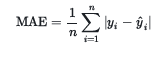

MAE is a very simple metric which calculates the absolute difference between actual and predicted values.
To better understand, let’s take an example you have input data and output data and use Linear Regression, which draws a best-fit line. Now you have to find the MAE of your model which is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete 
dataset.
So, sum all the errors and divide them by a total number of observations and this is MAE. We aim to get a minimum MAE because this is a loss.
* Advantages of MAE

 a. The MAE you get is in the same unit as the output variable.

 b. It is most Robust to outliers.

* Disadvantages of MAE

 a. The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.


2. Mean Squared Error(MSE)

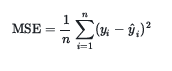

 MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference
 between actual and predicted value. So, above we are finding the absolute difference and here we are finding the squared difference.

 What actually the MSE represents? It represents the squared distance between actual and predicted values. We perform squared to avoid the cancellation of
 negative terms. This is the benefit of MSE.

 * Advantages of MSE

 1. The graph of MSE is differentiable, so you can easily use it as a loss function.

* Disadvantages of MSE

 1. The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.
 2. If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

3. Root Mean Squared Error(RMSE)

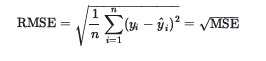

As RMSE is clear by the name itself, that it is a simple square root of mean squared error.
*  Advantages of RMSE

 1. The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

* Disadvantages of RMSE

 1. It is not that robust to outliers as compared to MAE for performing RMSE we have to NumPy NumPy square root function over MSE.

Most of the time people use RMSE as an evaluation metric and mostly when you are working with deep learning techniques the most preferred metric is RMSE

4. Root Mean Squared Log Error(RMSLE)

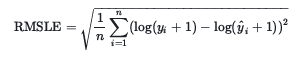

 Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In
 that case, the output will vary on a large scale.
 To control this situation of RMSE we take the log of calculated RMSE error and resultant we get as RMSLE. It is a very simple metric that is used by most of
 the datasets hosted for Machine Learning competitions

5. R Squared(R2) Score

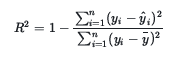

R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context. So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which
 is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.
 Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.Now, how will you interpret the R2 score?
 
 Suppose if the R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means
 model performance is worst, It is not capable to take advantage of the output column.
 
 Now the second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible. 
 
 So we can conclude that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves. The normal case is when the R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data.

# 10. 👷🏻 Model building 🚧🏗 

Let us make our first model to predict the target variable. We will start with Simple Linear Regression which is used for coming up with the line of best fit.

Most of the machine learning algorithms can not handle categorical variables unless we convert them to numerical values, because machine learning algorihtms are nothing but a mathematical equation and it requires numbers to work on not some string values. Many algorithm’s performances vary based on how categorical features are encoded. There are vaious encoding techniques:
* Label Encoding.
* One Hot Encoding.
* Ordinal Encoding.
* Mean Encoding or Target Encoding.

Here, we will use Label Encoding has it simple and gets the job done

In [171]:
from sklearn.preprocessing import LabelEncoder

X = raw_train.drop(['Order Date', 'order_month_year', 'Ship Date', 'ship_month_year', 'Sales', 'sales_transform'], axis=1)
for col in X.columns:
    if X[col].dtype == 'object':
        lb = LabelEncoder() # Shift + Tab
        X[col + '_encoded'] = lb.fit_transform(X[col].values)
        X.drop(columns=col, inplace=True)

y = raw_train['Sales']

X.shape, y.shape

((6992, 23), (6992,))

In [172]:
y.head()

,Sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680


 Below we can created some helper functions. These are used to showcase the ouput in a systematic manner, so it is easy to understant the results

In [173]:
!pip install prettytable
!pip install xgboost

In [174]:
models_results_rsme = { }
models_results_r2 = { }

def evaluate(y_t,y_p,title):
  table = PrettyTable()
  table.field_names = ['Metric', 'Value']

  rmse = mean_squared_error(y_t,y_p)
  r2 = r2_score(y_t,y_p)

  table.add_row(['RMSE',rmse])
  table.add_row(['R2',r2])

  print(table)

def plot_forecasted_sales(y_pred,y_train,
                          y_true=[],period=5,title=''):
  plt.figure(figsize=(20,8))
  plt.plot(y_train.to_list(),color=colors[0])
  plt.plot([None for i in y_train] + [x for x in y_pred],color=colors[2])

  if len(y_true) > 0:
        plt.plot([None for i in y_train] + [x for x in y_true], color=colors[1])
        plt.legend(['2014-2016 Acual SALES', '2017 Acual SALES', f'2017 Forecasted SALES \
        (RMSE = {mean_squared_error(y_true, y_pred)}, R2 = {r2_score(y_true, y_pred)})'])

  else:
        plt.legend(['2014-17 ACTUAL SALES',
                    '2018-2020 Forecasted SALES'])
  plt.xticks(range(0,len(y_train)+len(y_pred),period), rotation=75)
  # plt.xticks(range(0,len(y_train)+len(y_pred),period,rotation=75))
  plt.xlabel('Week')
  plt.ylabel('Sales')
  plt.title(title)
  plt.show()

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. 

We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

 The dataset has been divided into training and validation part. Let us import LinearRegression from sklearn.linear_model and mean_squared_error and r2_score from sklearn.metrics.

# 11.👨🏽‍💻 ALGORITHMS

### 🔹 1. Linear Regression
A simple yet powerful algorithm that models the linear relationship between the independent variables and the target variable.

- **Assumptions**: Linearity, no multicollinearity, and homoscedasticity.
- **Advantages**: Easy to interpret, fast to train.
- **Limitations**: Performs poorly when the relationship between features and target is non-linear or when outliers are present.


In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelLR = LinearRegression()
modelLR.fit(X_train,y_train)
y_pred = modelLR.predict(X_test)

evaluate(y_test,y_pred,title='Linear Regression')

+--------+--------------------+
| Metric |       Value        |
+--------+--------------------+
|  RMSE  | 112121.91605092747 |
|   R2   | 0.6988240860100007 |
+--------+--------------------+


### 🔹 2. Decision Tree Regressor
A non-linear model that splits the data into decision nodes based on feature values.

- **Working**: Recursively partitions the data to minimize variance in each leaf node.
- **Advantages**: Handles both numerical and categorical data, interpretable, captures non-linear relationships.
- **Limitations**: Can easily overfit the training data without proper tuning (e.g., `max_depth`).


In [177]:
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor(max_depth=3)
modelDTR.fit(X_train,y_train)
y_pred = modelDTR.predict(X_test)

evaluate(y_test,y_pred,title='Decision Tree Regression')

+--------+--------------------+
| Metric |       Value        |
+--------+--------------------+
|  RMSE  | 142746.65031650348 |
|   R2   | 0.6165615573448082 |
+--------+--------------------+


### 🔹 3. Random Forest Regressor
An ensemble model that combines the output of multiple decision trees to reduce overfitting and improve generalization.

- **Working**: Trains multiple trees on random subsets of the data and averages their predictions.
- **Advantages**: High accuracy, robust to noise and outliers, handles non-linearity well.
- **Limitations**: More complex and less interpretable than individual trees.


In [178]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(max_depth=10)
modelRFR.fit(X_train,y_train)
y_pred = modelRFR.predict(X_test)

evaluate(y_test,y_pred,title='Random Forest Regression')

+--------+--------------------+
| Metric |       Value        |
+--------+--------------------+
|  RMSE  | 75213.56616641904  |
|   R2   | 0.7979653279887812 |
+--------+--------------------+


### 🔹 4. Support Vector Regressor (SVR)
An adaptation of Support Vector Machines for regression tasks.

- **Working**: Fits a curve within a margin of tolerance (epsilon) and ignores small deviations.
- **Advantages**: Effective in high-dimensional spaces, robust to overfitting.
- **Limitations**: Sensitive to feature scaling, slow on large datasets.


In [179]:
from sklearn.svm import SVR
modelSVR = SVR()
modelSVR.fit(X_train,y_train)
y_pred = modelSVR.predict(X_test)

evaluate(y_test,y_pred,title='Support Vector Regression')

+--------+----------------------+
| Metric |        Value         |
+--------+----------------------+
|  RMSE  |  397147.3904765932   |
|   R2   | -0.06679614948073054 |
+--------+----------------------+


### 🔹 5. XGBoost Regressor
An advanced gradient boosting algorithm that builds trees sequentially and corrects errors from previous trees.

- **Working**: Optimizes a loss function using gradient descent and regularization.
- **Advantages**: Fast, scalable, handles missing values natively, great for competitions.
- **Limitations**: Requires careful hyperparameter tuning, less interpretable.


In [180]:
modelXGB = XGBRegressor()
modelXGB.fit(X_train,y_train)
y_pred = modelXGB.predict(X_test)

evaluate(y_test,y_pred,title='XGBoost ')

+--------+--------------------+
| Metric |       Value        |
+--------+--------------------+
|  RMSE  | 119619.67670265502 |
|   R2   | 0.6786840010319968 |
+--------+--------------------+


To solve the sales prediction problem, we applied a variety of supervised machine learning regression algorithms. Each model was trained, evaluated and compared based on prediction accuracy using metrics like RMSE (Root Mean Squared Error) and R² Score.

### 📊 Model Performance Comparison

Each model was trained on the processed training data and evaluated on a hold-out test set using RMSE and R² Score:

| Algorithm                | RMSE      | R² Score |
|--------------------------|-----------|----------|
| Linear Regression         | 334.84    | 0.6988   |
| Decision Tree Regressor  | 377.82    | 0.6166   |
| Random Forest Regressor  | 281.73    | 0.7868   |
| Support Vector Regressor | 630.19    | -0.0668  |
| XGBoost Regressor        | 299.71    | 0.7587   |


# 12. 📊 Data Visualization

In the final phase of the project, we visualized model performance using evaluation metrics and showcased the actual predictions from the best-performing model (Random Forest Regressor).


### 📊 1. R² Score Comparison (Bar Plot)

- **Purpose**: To visually compare how well each regression model explains the variance in the target variable (`Sales`).
- **Plot Type**: Bar chart of R² scores for each model.
- **Insight**: 
  - The **Random Forest Regressor** achieved the highest R² score (~0.79), indicating it explains nearly 79% of the variance in sales.
  - Other models like Linear Regression and XGBoost also performed decently, while SVR significantly underperformed.
- **Interpretation**: Higher R² implies better model generalization and predictive power.


In [ ]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_r2, index=['']).plot.bar(color=colors2);
plt.xlabel('R2 Score');

### 📊 2. RMSE Comparison (Bar Plot)

- **Purpose**: To visualize the average error (in original units) of predictions made by each model.
- **Plot Type**: Bar chart of RMSE values.
- **Insight**: 
  - Random Forest had the **lowest RMSE (~281.7)**, confirming it made the most accurate predictions overall.
  - SVR had the **highest RMSE (~630)**, making it unsuitable for this task.
- **Interpretation**: A lower RMSE indicates a model is making predictions closer to the actual values.


In [ ]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_rmse, index=['']).plot.bar(color=colors2);
plt.xlabel('Root Mean Square Error');


### 🔮 3. Forecasting Visualization (Line Plot)

- **Purpose**: To visualize predicted vs actual sales using the best model on a subset of test data (top 50 samples).
- **Plot Type**: Line plot showing:
  - Actual Sales (`y_test`)
  - Predicted Sales (`y_pred`)
- **Insight**: The predicted values follow the trend of actual sales closely, with some deviation for outlier cases.
- **Interpretation**: This confirms that the model generalizes well on unseen data and is reliable for future sales forecasting.


In [ ]:
X = raw_test.drop(['Order Date', 'order_month_year', 'Ship Date', 'ship_month_year'], axis=1)
for col in X.columns:
    if X[col].dtype == 'object':
        lb = LabelEncoder()
        X[col + '_encoded'] = lb.fit_transform(X[col].values)
        X.drop(columns=col, inplace=True)
days = 50
y_pred = modelRFR.predict(X)[:days]
y_test = df.iloc[6994:,-4][:days]
plot_forecasted_sales(y_train=y_test, y_pred=y_pred, period=days, title='Forecasting Best Performed Model (Random Forest Regression)')

## ✅ Conclusion

This project demonstrated a complete end-to-end workflow for solving a **sales prediction problem** using machine learning regression techniques on Superstore retail data. Beginning with thorough data exploration and preprocessing, we identified key patterns in customer behavior, product demand, and regional profitability.

Through rigorous model training and evaluation, we applied multiple algorithms including **Linear Regression**, **Decision Tree**, **Random Forest**, **XGBoost**, and **SVR**. Among them, the **Random Forest Regressor** outperformed all others with the lowest RMSE (~281.7) and highest R² Score (~0.7868), making it the most suitable model for sales forecasting in this context.

EDA helped uncover business-critical insights:
- Most profitable segments were **Consumer** and **South Region**.
- Sales spike in **Q4** due to seasonal demand.
- Discounts above 30% often result in **loss-making sales**.
- **Office Supplies** dominate in volume, but **Technology** has higher margins.

These insights can assist the business in optimizing shipping modes, discount strategies, and inventory planning.

---

## 🔮 Future Trends & Enhancements

While the current workflow achieved high performance and valuable business insights, there is potential to further enhance it:

### 📌 Model Improvements
- Apply **hyperparameter tuning** (GridSearchCV, RandomizedSearchCV) to optimize model performance.
- Use **stacking or ensemble learning** to combine the strengths of multiple regressors.
- Integrate **deep learning architectures** (like LSTM) for sequence-based forecasting.

### 📌 Feature Enhancements
- Incorporate **external data** such as holidays, promotions, or economic indicators to enrich the dataset.
- Engineer **lag-based features** and **moving averages** for better temporal learning.
- Add **customer-level aggregation** for more personalized insights.

### 📌 Deployment Opportunities
- Build an **interactive dashboard** using Streamlit or Dash for real-time decision-making.
- Deploy the trained model using **Flask or FastAPI** as a REST API for production use.
- Schedule **automated retraining** pipelines with new incoming data using tools like Airflow or Prefect.

### 📌 Business Applications
- Use insights to develop **region-specific marketing strategies**.
- Adjust **pricing and discount policies** based on profit-impact analysis.
- Forecast **inventory needs** to reduce overstocking or stockouts.

> 🚀 By adopting these future enhancements, the predictive system can evolve into a scalable and intelligent business decision-support tool.
